# Life Expectancy - Regression Analysis
Having recently completed a machine learning course at school, I wanted to apply some of the techniques I learnt to my own project. The topic of public health and diseases have always interested me, so I decided to put my skills to the test using [life expectancy data](https://www.kaggle.com/kumarajarshi/life-expectancy-who) from kaggle.

## The Goals:
* Predict life expectancy of countries based off various factors such as GDP, schooling, infection rates etc
* Compare the accuracy of different models using metrics like R2 scores

In [67]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets,linear_model
from sklearn.metrics import mean_squared_error, r2_score

## Understanding the data
Before attempting to build any models, lets first explore some of the data to get a grasp of the variables we are dealing with. Looking through the table below, we can get a good idea of how the data is structured.

In [68]:
df = pd.read_csv('life_expectancy_data.csv')
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


Our main variable of interest is 'Life expectancy', so lets get an idea of how these values are distributed.

Mean: 69.22493169398908
Skewness: -0.6386047358773552


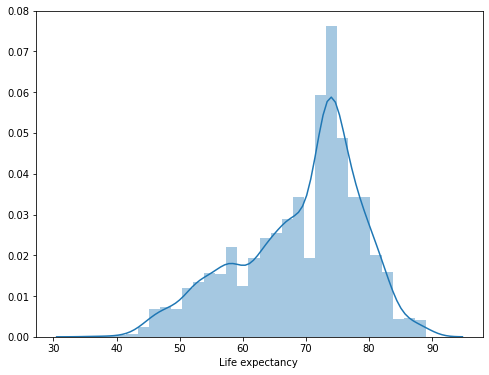

In [69]:
target = df['Life expectancy ']
sns.distplot(target)
plt.gcf().set_size_inches(8, 6)
print(f'Mean: {target.mean()}')
print(f'Skewness: {target.skew()}')

We can also get a heatmap which shows us the strengths of correlations between each variable

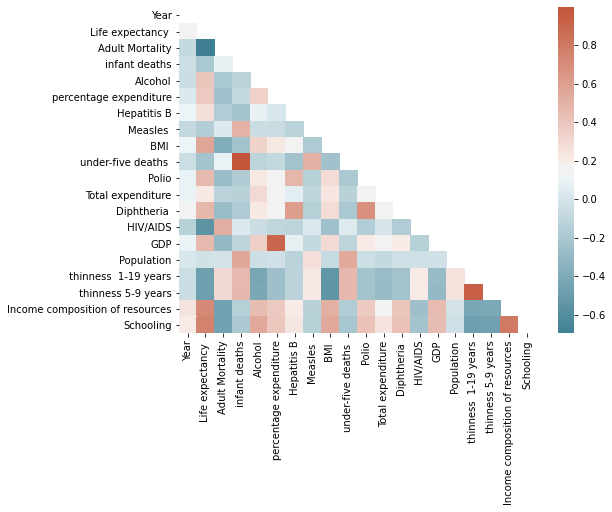

In [70]:
corr = df.corr()

# Creating mask
mask = np.triu(np.ones(corr.shape)).astype(np.bool)

# Generating colour map object
cmap = sns.diverging_palette(220, 20, as_cmap=True)

hmap = sns.heatmap(corr, mask=mask, cmap=cmap)
plt.gcf().set_size_inches(8, 6)